# **Introduction**

**Water Quality**
Water quality refers to the chemical, physical, and biological characteristics of water based on the standards of its usage.It is most frequently used by reference to a set of standards against which compliance, generally achieved through treatment of the water, can be assessed. The most common standards used to monitor and assess water quality convey the health of ecosystems, safety of human contact, extend of water pollution and condition of drinking water. Water quality has a significant impact on water supply and oftentimes determines supply option


The aim of this project is to deal with missing values and evaluate by using different models. The models used here are:
* Decision Tree
* Random Forest
* Logistic Regression
* K-Nearest-Neighbors
* SVM

# Features Descriptions

This dataset contains 10 columns:

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap caused by Calcium and Magnesium in mg/L.

3. Solids: Total dissolved solids in ppm such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc.

4. Chloramines: Amount of Chloramines in ppm. 

5. Sulfate: Amount of Sulfates dissolved in mg/L. 

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# Import the Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Read and Explore Data

In [28]:
df = pd.read_csv('Team_25_dataset.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [29]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [30]:
#The total numbers of the dataset is 3276
df.shape

(3276, 10)

In [31]:
100*df.isnull().sum()/len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

The missing values are columns 
* 'ph', 14.98%
* 'sulfate', 23.84%
* 'Trihalomethanes', 4.94% 


In [32]:
df_dropped = df.dropna()
print("The total missing value accounts", 100-round(df_dropped.shape[0]/df.shape[0]*100), "% of the total data")

The total missing value accounts 39 % of the total data


It might not be a good idea to drop all the missing value columns. Let's continue exploring the dataset and then deal with these missing values.

In [33]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [34]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

The difference between mean and median values of non-potable water is small. 
* ph:               7.0354 (median) 7.0854 (mean)
* Sulfate:        333.3894 (median) 334.5643 (mean)
* Trihalomethanes: 66.5422 (median) 66.3035 (mean)

Let's continue to see the result for potable water

In [35]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [36]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

The difference between mean and median values of potable water is also small. 
* ph:               7.0367 (median) 7.0737 (mean)
* Sulfate:        331.8381 (median) 332.5670 (mean)
* Trihalomethanes: 66.6782 (median) 66.5397 (mean)

Thus we can use the overall median of the feature to impute values.

In [37]:
df['ph'].fillna(value=df['ph'].median(), inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(), inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [39]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now the dataset is complete. Let's explore it!

In [40]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Let's check our target variable 'Potability'

In [41]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

60.989% is Potable.
39.011% is not Potable. Though Potable is 20% higher than Non-potable, I would say this is acceptable and still can be counted as balance data. 

Now let's look at the distribution of data

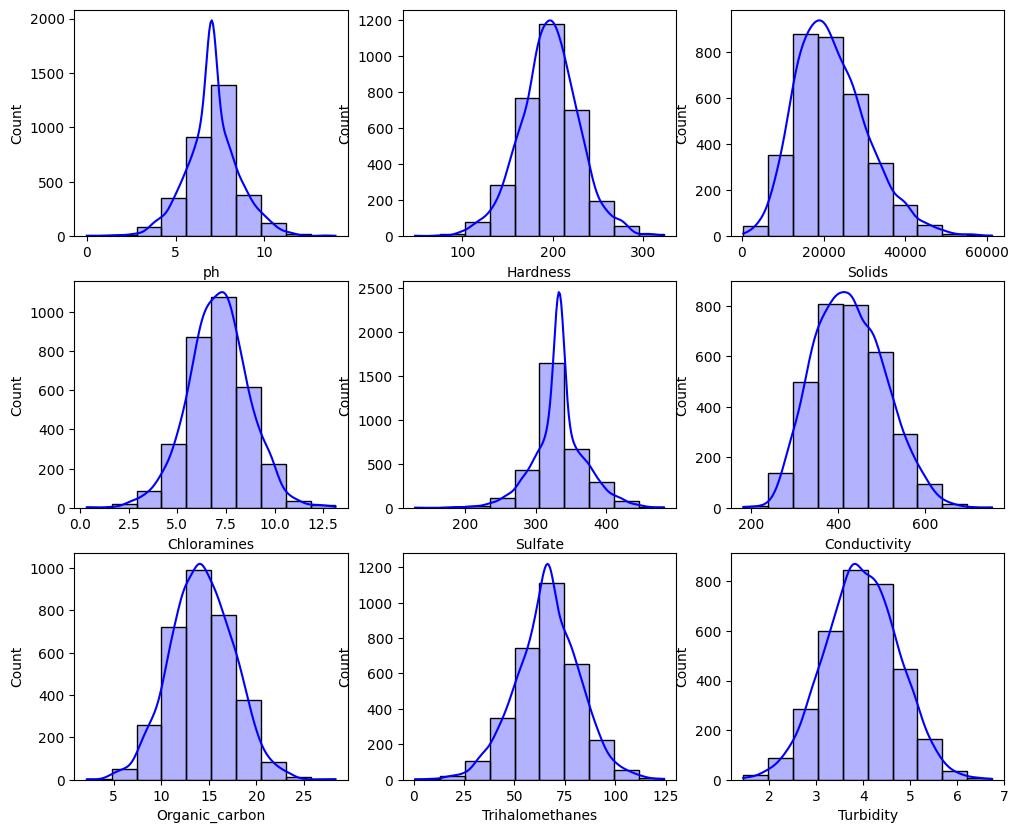

In [42]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],kde=True,alpha=0.3, bins=10, color='blue',common_norm=False)

In [43]:
df.skew().sort_values(ascending = False)

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.041266
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.027278
Hardness          -0.039342
Trihalomethanes   -0.087289
dtype: float64

Most features are normal distribution. Values between 0.5 to -0.5 will be considered as the normal distribution. Though Solids has value slightly above 0.5, we still consider it doesn't have skewness.

In [44]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.020476
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.006887
ph                 0.003014
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.8, 1500, 'Safe for Human consumption')

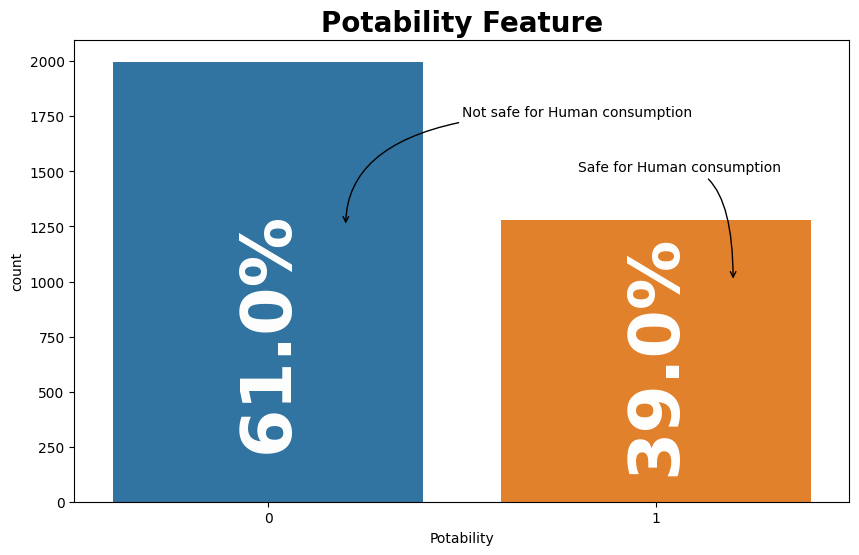

In [45]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax =sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

<AxesSubplot: >

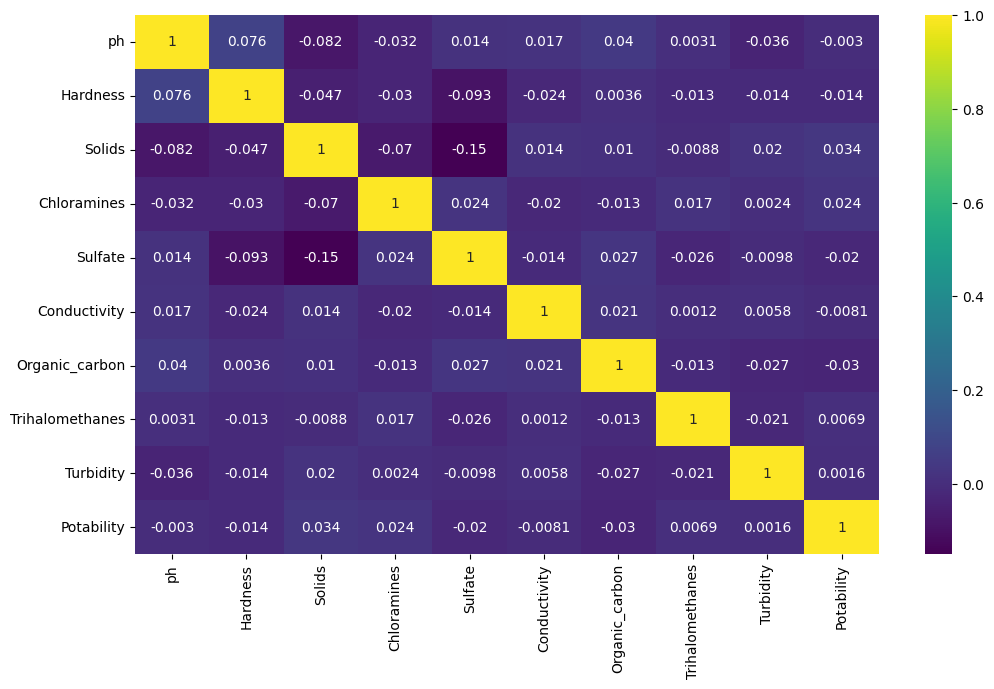

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

There is no column that has high correlation with Potability. The highest correlation is solids with 0.033 only.

In [47]:
df['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

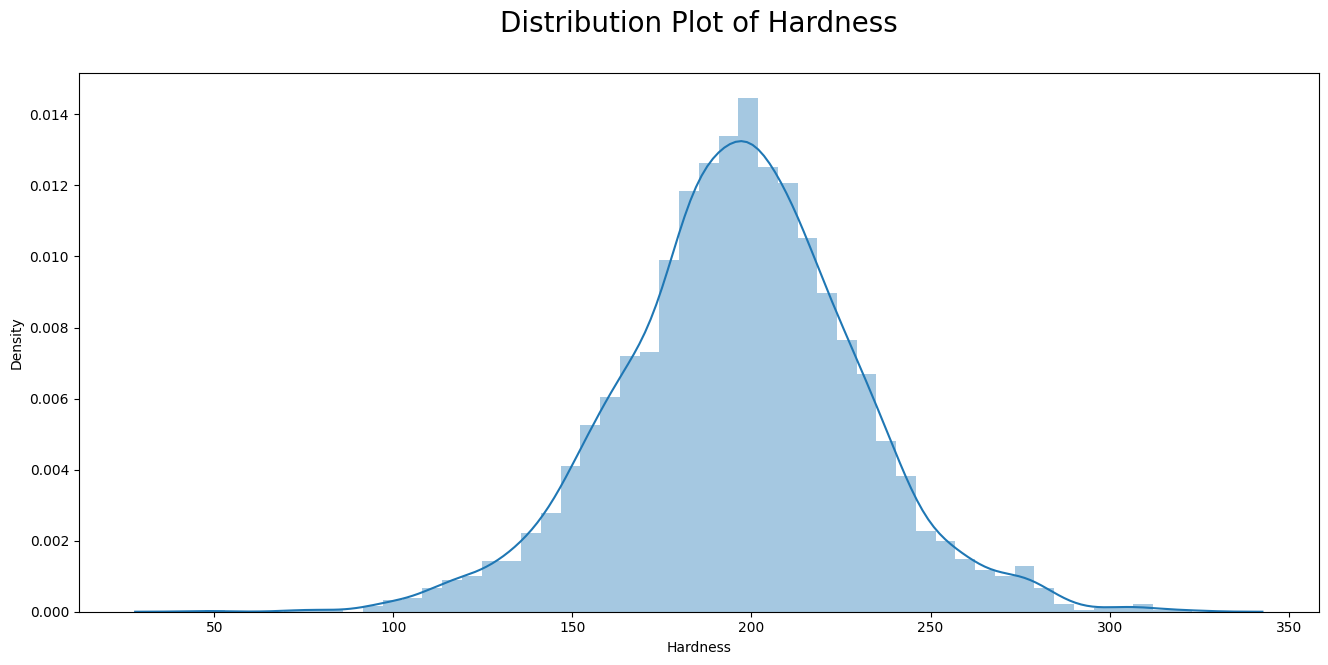

In [48]:
plt.figure(figsize = (16, 7))
sns.distplot(df['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

# Data Preprocessing

Now, we have dealt with null value, checked with skewness, and explored the potential correlations. Let's continue to further exploration.

In [49]:
#The first step is to scale the data. 
#This is important because scaling can ensure that one factor will not impact the model just because of their large magnitude.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.drop('Potability', axis =1)
y = df['Potability']
features = X.columns
X[features] = sc.fit_transform(X[features])
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797


In [50]:
# import train test split
from sklearn.model_selection import train_test_split
# assign 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**1. Decision Tree**

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
from sklearn.tree import DecisionTreeClassifier 

In [53]:
from sklearn import tree

In [54]:
# create the model
DeTree = DecisionTreeClassifier(max_depth = 4, random_state = 42, min_samples_leaf = 1, criterion ='entropy')
# model training
DeTree.fit(X_train, y_train)
# prediction
DeTree_pred = DeTree.predict(X_test)
# accuracy
DeTree_acc = accuracy_score(y_test, DeTree_pred)

In [55]:
print("The accuracy for Decision Tree is", DeTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DeTree_pred))

The accuracy for Decision Tree is 0.6451016635859519
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



<AxesSubplot: >

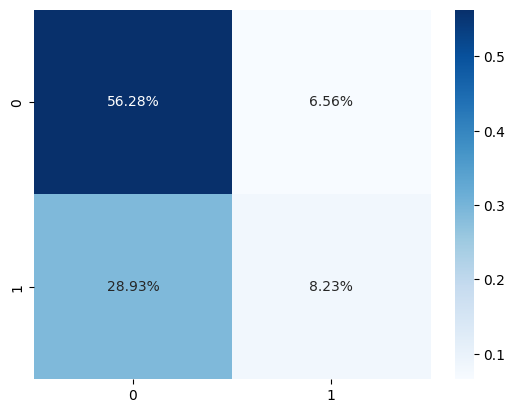

In [56]:
# let's plot confusion matrix
DeTree_cm = confusion_matrix(y_test, DeTree_pred)
sns.heatmap(DeTree_cm/np.sum(DeTree_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

**2. Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# create the model
RmTree = RandomForestClassifier(n_estimators =100,min_samples_leaf =2, random_state = 42)
# model training
RmTree.fit(X_train, y_train)
# prediction
RmTree_pred = RmTree.predict(X_test)
# accuracy
RmTree_acc = accuracy_score(y_test, RmTree_pred)

n_estimators -->number of trees in the forest
max_depth---->trees are expanded.....

In [59]:
print("The accuracy for Random Forest is", RmTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RmTree_pred))

The accuracy for Random Forest is 0.6719038817005545
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       680
           1       0.61      0.32      0.42       402

    accuracy                           0.67      1082
   macro avg       0.65      0.60      0.59      1082
weighted avg       0.66      0.67      0.64      1082



<AxesSubplot: >

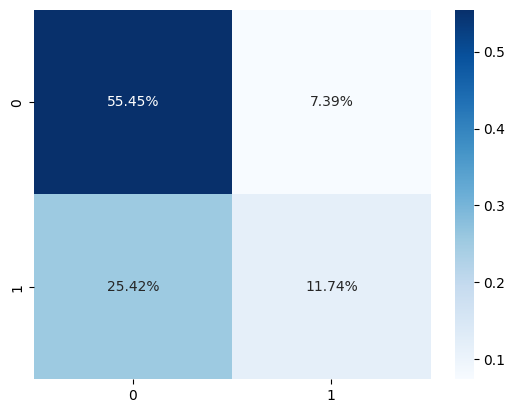

In [60]:
# let's plot confusion matrix
RmTree_cm = confusion_matrix(y_test, RmTree_pred)
#RmTree_cm
sns.heatmap(RmTree_cm/np.sum(RmTree_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

**3. Logistic Regression** 

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# create the model
LogReg = LogisticRegression(random_state = 42)
# model training
LogReg.fit(X_train, y_train)
# prediction
LogReg_pred = LogReg.predict(X_test)
# accuracy
LogReg_acc = accuracy_score(y_test, LogReg_pred)

In [63]:
print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.6284658040665434
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot: >

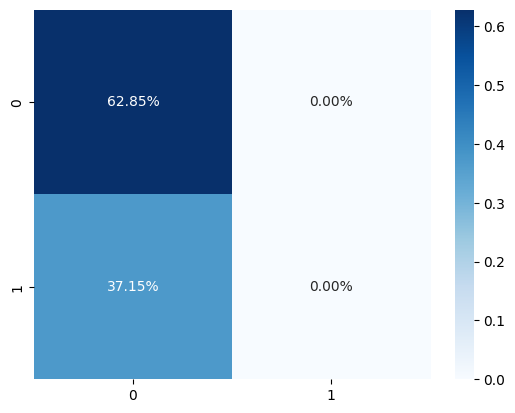

In [64]:
# let's plot confusion matrix
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

**4. KNN**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# create the model
KNN = KNeighborsClassifier(n_neighbors = 8, leaf_size =20)
# model training
KNN.fit(X_train, y_train)
# prediction
KNN_pred = KNN.predict(X_test)
# accuracy
KNN_acc = accuracy_score(y_test, KNN_pred)

In [67]:
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.6571164510166358
The classification report using KNeighbors is: 0.6571164510166358
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       680
           1       0.58      0.27      0.37       402

    accuracy                           0.66      1082
   macro avg       0.63      0.58      0.57      1082
weighted avg       0.64      0.66      0.62      1082



<AxesSubplot: >

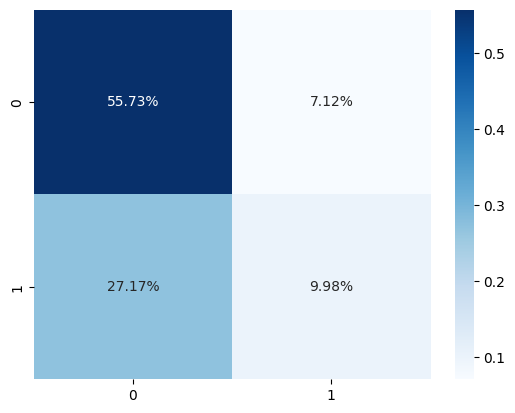

In [68]:
# let's plot confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

**5. SVM**


In [69]:
from sklearn.svm import SVC, LinearSVC

In [70]:
# create the model
SVM = SVC(kernel ='rbf', random_state = 42)
# model training
SVM.fit(X_train, y_train)
# prediction
SVM_pred = SVM.predict(X_test)
# accuracy
SVM_acc = accuracy_score(y_test, SVM_pred)

In [71]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))
print(y_test)

The accuracy for SVM is 0.6894639556377079
The classification report using SVM is: 0.6894639556377079
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       680
           1       0.68      0.31      0.42       402

    accuracy                           0.69      1082
   macro avg       0.69      0.61      0.61      1082
weighted avg       0.69      0.69      0.65      1082

2947    0
2782    1
1644    0
70      0
2045    1
       ..
1662    0
445     0
617     0
1474    0
2555    0
Name: Potability, Length: 1082, dtype: int64


<AxesSubplot: >

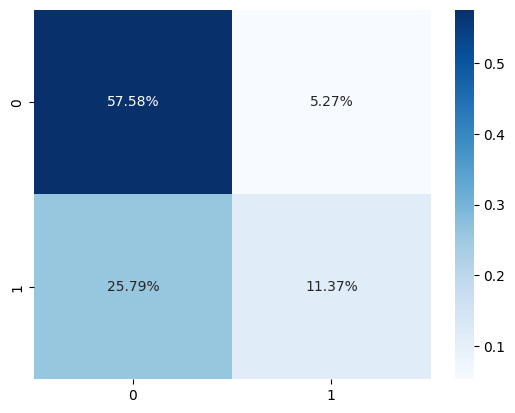

In [72]:
# let's plot confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

# Summary

Now let's make a summary of these models.

In [73]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'SVM'],
    'Accuracy' :[LogReg_acc, DeTree_acc, RmTree_acc,KNN_acc, SVM_acc]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,SVM,0.689464
2,Random Forest,0.671904
3,KNeighbours,0.657116
1,Decision Tree,0.645102
0,Logistic Regression,0.628466


<AxesSubplot: xlabel='Model', ylabel='Accuracy'>

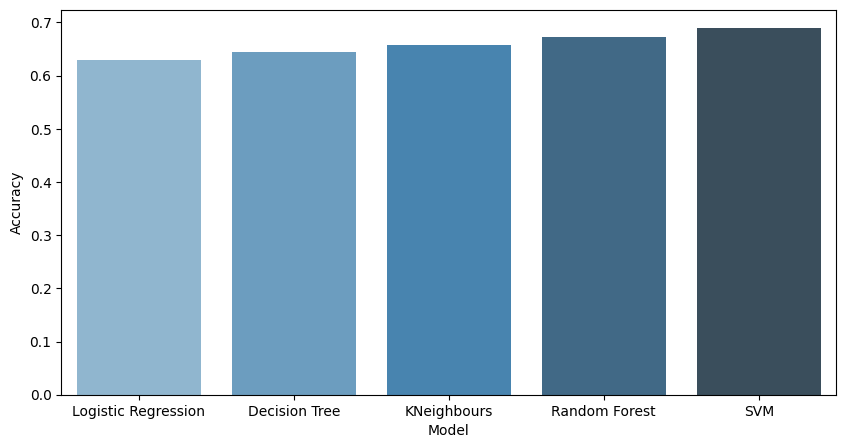

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data = models, 
            order = models.sort_values("Accuracy").Model,
           palette = 'Blues_d')

Overall, the differences between models are small, if you have to pick a best one, SVM has highest accuracy.

In [75]:
zero = df[df['Potability']==0]
one = df[df['Potability']==1]

In [76]:
print(zero.shape,one.shape)

(1998, 10) (1278, 10)


In [77]:
x = df.drop('Potability', axis = 1) #getting x
y = df['Potability'] #getting y 

In [78]:
from sklearn.preprocessing import MinMaxScaler
#Now, lets scale all the value in x within 0 to 1...
scaler = MinMaxScaler() # creating object of MinMaxScaler
scaler.fit(x)

x = scaler.transform(x)

x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.579704,0.368912,0.678284,0.534508,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.579704,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.579704,0.387157,0.343638,0.622659,0.616120


In [79]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

In [80]:
x_res.shape,y_res.shape

((3996, 9), (3996,))

Text(0, 0.5, 'Frequency')

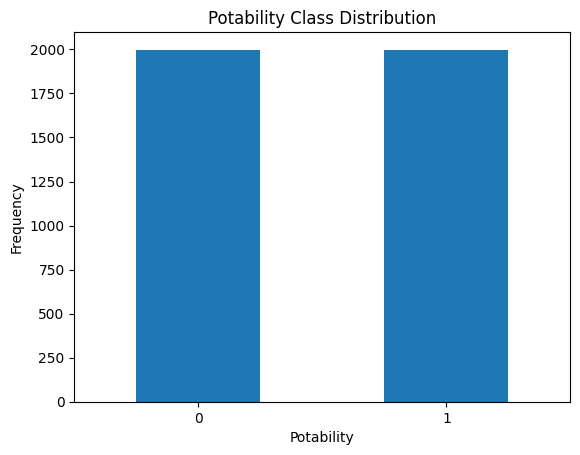

In [81]:
count_classes = pd.value_counts(y_res,sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Potability Class Distribution")
plt.xticks(range(2))
plt.xlabel("Potability")
plt.ylabel("Frequency")

In [82]:
df['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

BUILDING A PREDICTIVE MODEL USING SVM


In [83]:
import pandas as pd
import numpy as np
df = pd.read_csv('Team_25_dataset.csv')
# splitting the dataset
X = df.drop('Potability', axis =1)
y = df['Potability']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# training the model
# create the model
SVM = SVC(kernel ='rbf', random_state = 42)
# model training
SVM.fit(X_train, y_train)
# giving inputs to the machine learning model
# features = [[ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,,Turbidity,Potability]
features = np.array([[9.058628424072683,
155.35755713289635,
15737.46893784722,
7.251978855273583,
343.2339769805977,
463.3892559930158,
17.85447001822547,
83.17518933638533,
3.652134470079709
]])
# using inputs to predict the output
prediction = SVM.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]
